|Challenge Set       |**8 **            |
|-------------------:|:-----------------|
|Topic:              |Decision Tree     |
|Date:               |08/07/2016        | 
|Name:               |Bryant Biggs      |
|Worked with:        |N/A               |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
---

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import urllib.request 

import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1., rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data
data = 'house-votes-84.data'
names = 'house-votes-84.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

In [3]:
# name columns
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']

# load dataset
df = pd.read_csv(data, sep=',', names=columns)

# replace y's and n's with 1, 0
df = df.replace(['y', 'n'], [1, 0]) 

# replace replublican, democrat with 1,0
df = df.replace('republican',1)
df = df.replace('democrat',0)

In [4]:
# find majority vote average and replace '?' with majority vote average (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    avg = int(round(ones/(ones+zeros), 0))
    df[col] = df[col].replace('?', avg)

In [5]:
# split dataset into test, train
train, test = train_test_split(df, test_size = 0.30, random_state=4444)

data_cols = columns[1:]
label_cols = columns[0]

train_data = train[data_cols]
train_labels = train[label_cols]

test_data = test[data_cols]
test_labels = test[label_cols]

# <a id='1'></a>Challenge 1:
For the house representatives data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses.

In [6]:
# fit model
dtree_clf = DecisionTreeClassifier()
dtree_mdl = dtree_clf.fit(train_data, train_labels)

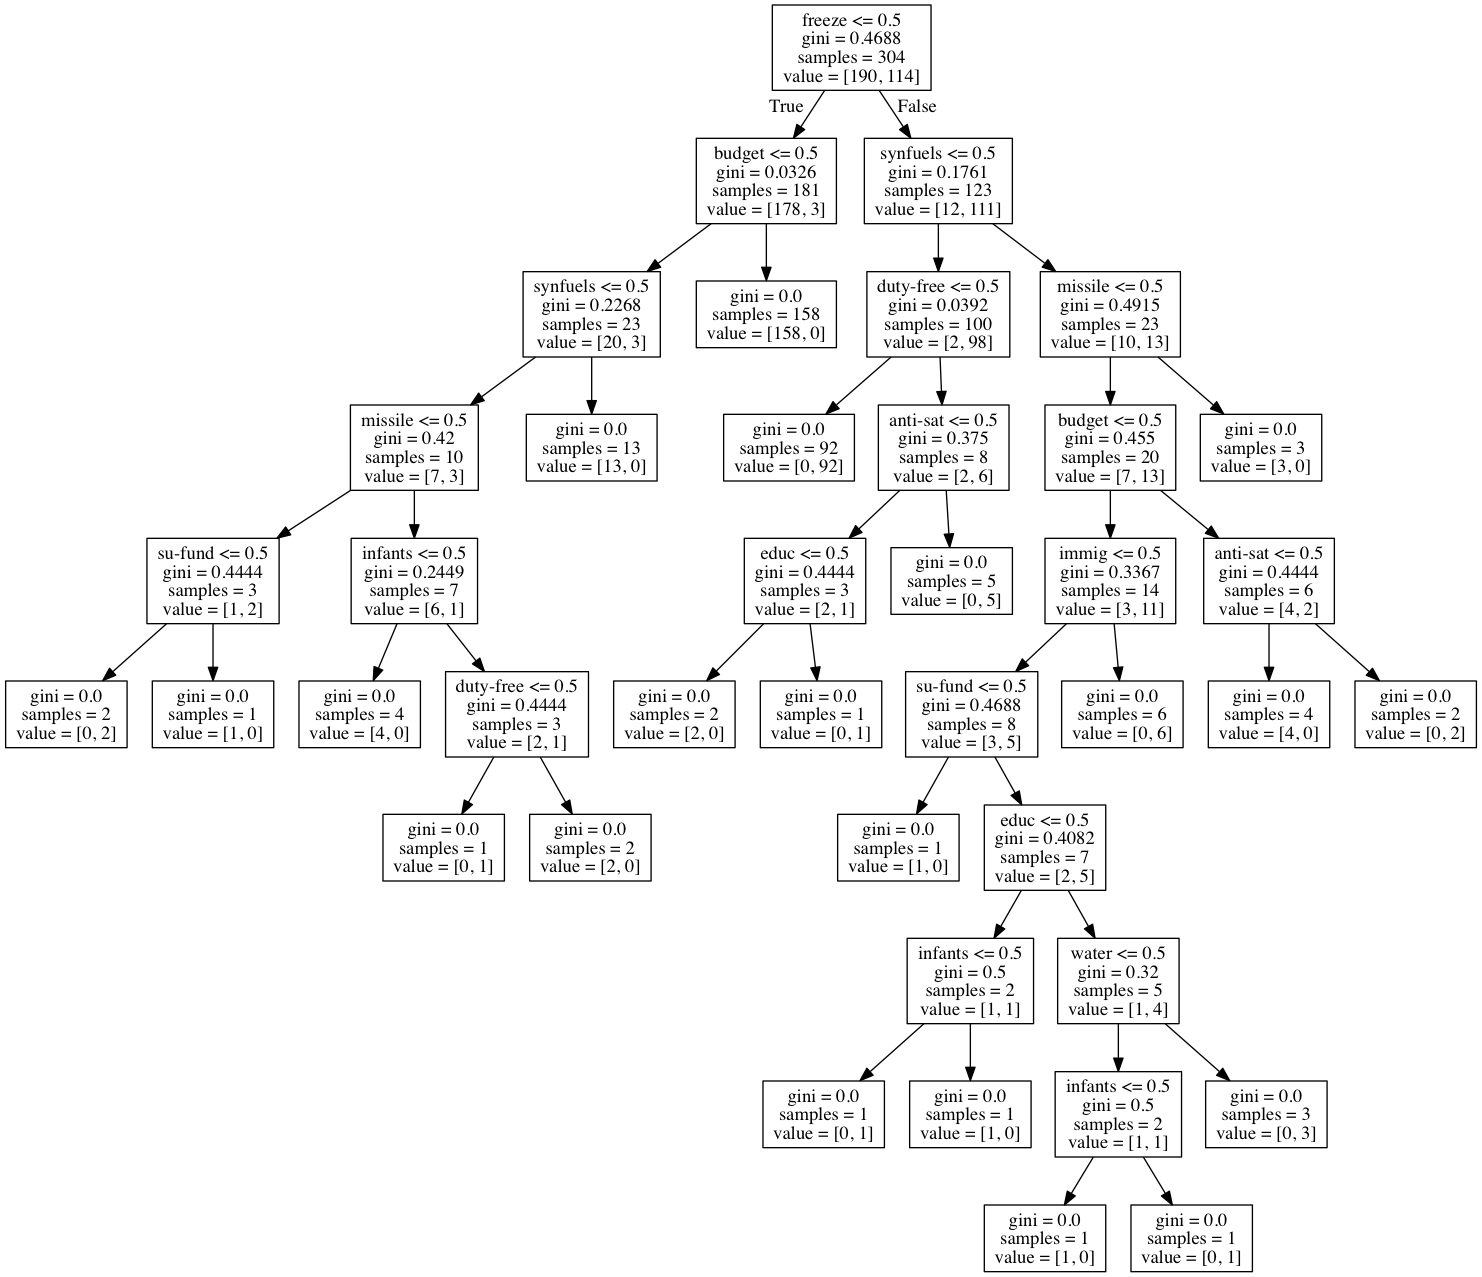

In [11]:
# output graphviz plot to pdf
dot_data = StringIO() 
export_graphviz(dtree_mdl, out_file=dot_data, feature_names=test_data.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# uncomment to write to file as pdf
# graph.write_pdf("representative_tree.pdf") 

from IPython.display import Image
Image('tree.png', unconfined=True)
Image(graph.create_png())  

## Answer for Challenge 1 is:
<br>
<font color='blue'>Shown above.</font>

___

# <a id='2'></a>Challenge 2:
Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.

In [12]:
# read in data
movie_data = '../../../challenges_data/2013_movies.csv'
df_mv = pd.read_csv(movie_data, sep=',')

In [13]:
# remove nan's
df_mv = df_mv.dropna(axis=0, how='any')

assert df_mv['Budget'].dtype == 'float64'
assert df_mv['DomesticTotalGross'].dtype == 'int64'
assert df_mv['Runtime'].dtype == 'int64'

# split data set
train, test = train_test_split(df_mv, test_size = 0.30, random_state=4444)

# grab label column
train_labels = train['Rating']
test_labels = test['Rating']

# grab data columns
train_data = train[['Budget', 'DomesticTotalGross', 'Runtime']]
test_data = test[['Budget', 'DomesticTotalGross', 'Runtime']]

In [14]:
# fit model
dtree_clf = DecisionTreeClassifier()
dtree_mdl = dtree_clf.fit(train_data, train_labels)

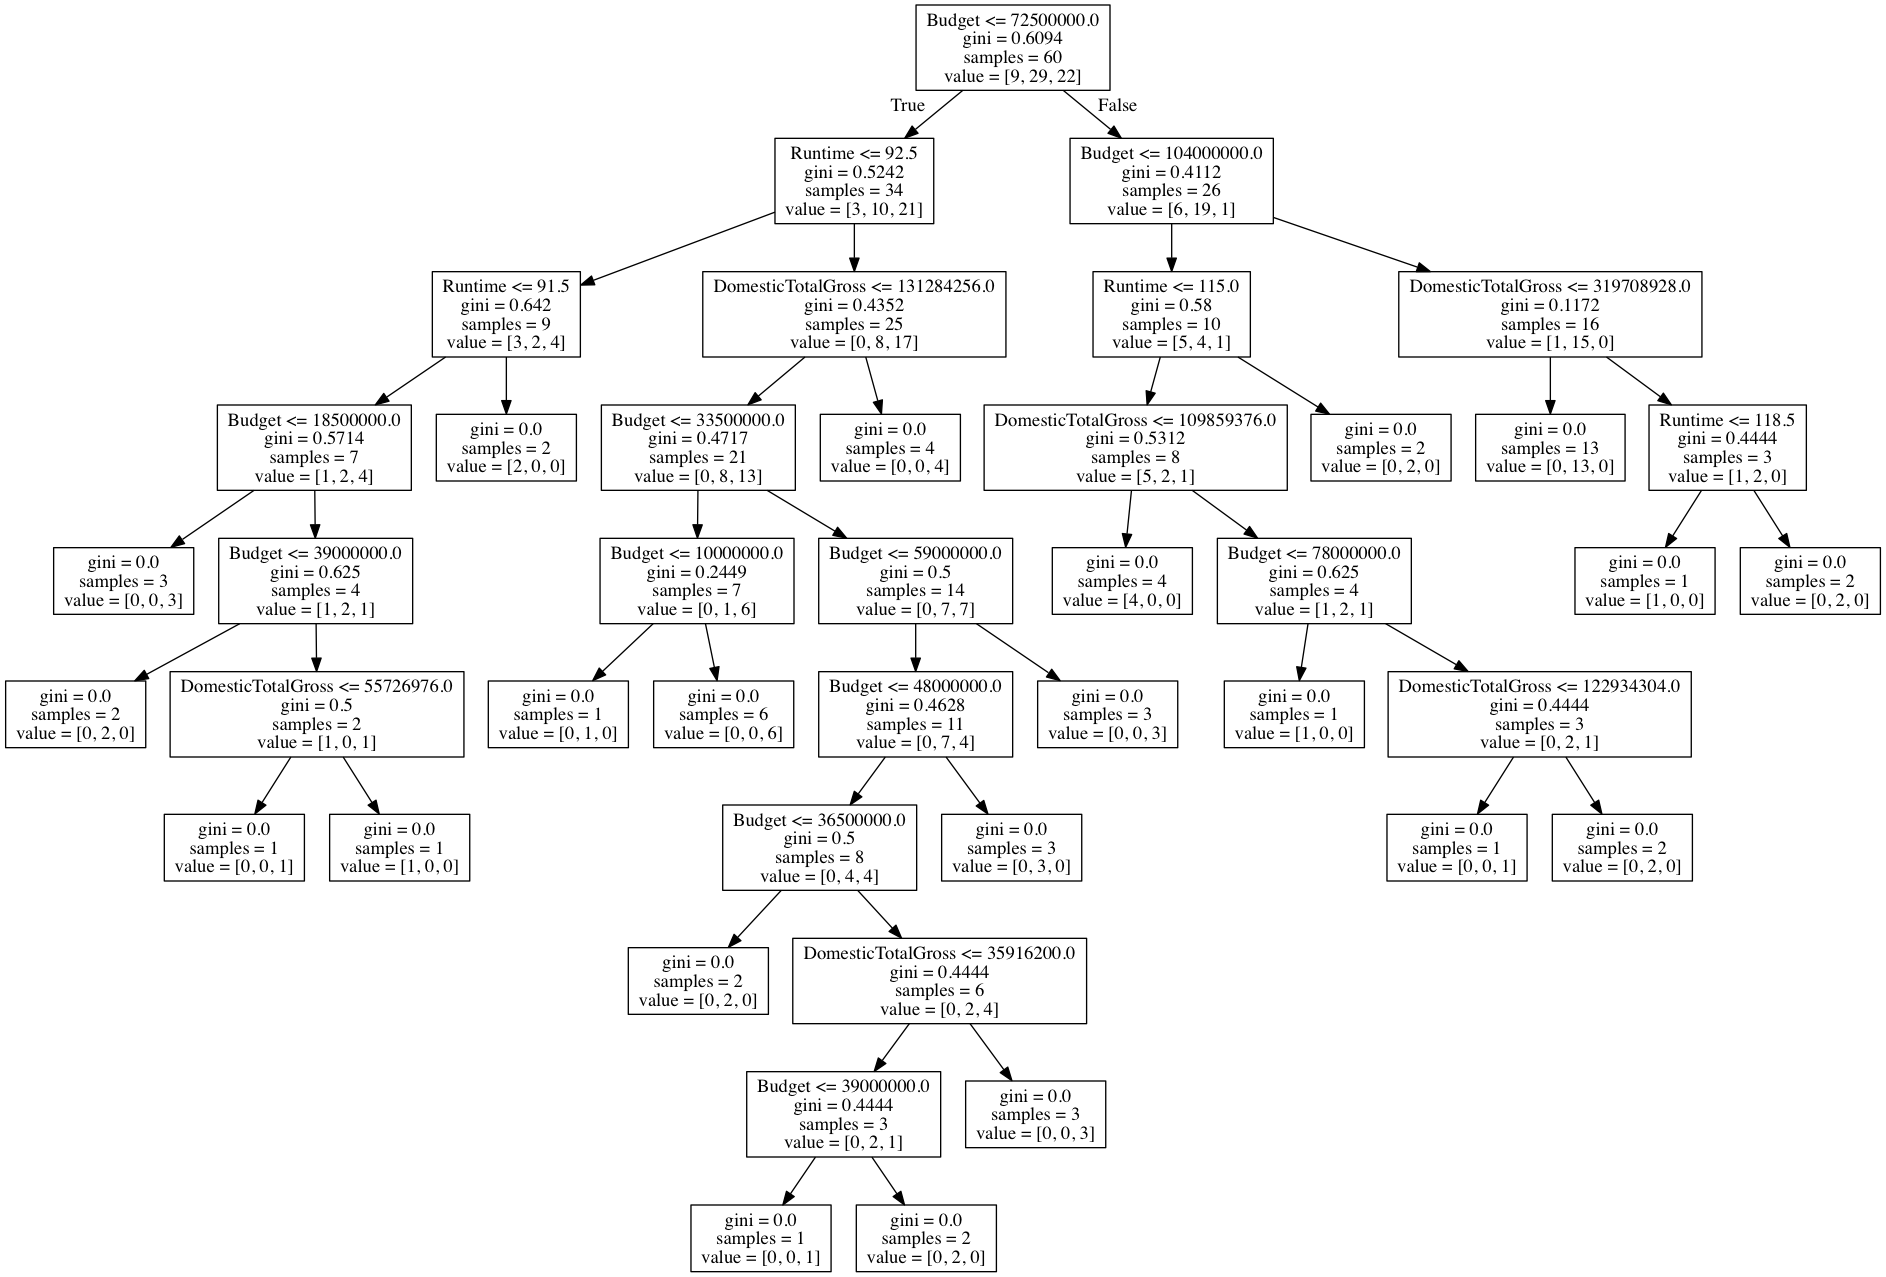

In [16]:
# output graphviz plot to pdf
dot_data = StringIO() 
export_graphviz(dtree_mdl, out_file=dot_data, feature_names=test_data.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# uncomment to write to file as pdf
# graph.write_pdf("representative_tree.pdf") 

Image('tree.png', unconfined=True)
Image(graph.create_png())  

## Answer for Challenge 2 is:

<font color='blue'>Shown above.</font>

___